In [1]:
# Importing required python libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import keras 
from keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Dropout, Flatten
import cv2

In [2]:
# Obtaining Training Dataset from Local Directory

train_data = tf.keras.utils.image_dataset_from_directory(
    "SIH-Vigrah/Aug_Dataset"
    , labels = 'inferred'
    , label_mode = 'int'
    , image_size=(224, 224)
    , color_mode = 'rgb'
    , shuffle = True
    , seed = 101
    , validation_split = 0.3
    , subset = "training"   
)

Found 226955 files belonging to 214 classes.
Using 158869 files for training.


In [3]:
# Obtaining Validation Dataset from Local Directory

val_data = tf.keras.utils.image_dataset_from_directory(
    "SIH-Vigrah/Aug_Dataset"
    , labels = 'inferred'
    , label_mode = 'int'
    , image_size=(224, 224)
    , color_mode = 'rgb'
    , shuffle = True
    , seed = 101
    , validation_split = 0.3
    , subset = "validation"   
)

Found 226955 files belonging to 214 classes.
Using 68086 files for validation.


In [4]:
# Obtaining Class Names

class_names = train_data.class_names
class_names

['a',
 'ba',
 'be',
 'bha',
 'bhe',
 'bhi',
 'bho',
 'bhu',
 'bhā',
 'bhī',
 'bhū',
 'bi',
 'bo',
 'bu',
 'bā',
 'ca',
 'ce',
 'cha',
 'che',
 'chi',
 'chu',
 'chā',
 'ci',
 'co',
 'cu',
 'cā',
 'cū',
 'da',
 'de',
 'dha',
 'dhe',
 'dhi',
 'dho',
 'dhu',
 'dhā',
 'dhī',
 'dhū',
 'di',
 'do',
 'du',
 'dā',
 'dī',
 'e',
 'ga',
 'ge',
 'gha',
 'ghe',
 'gho',
 'ghu',
 'ghā',
 'gi',
 'go',
 'gu',
 'gā',
 'ha',
 'he',
 'hi',
 'ho',
 'hu',
 'hā',
 'hī',
 'hū',
 'i',
 'ja',
 'je',
 'jha',
 'jhi',
 'jhā',
 'ji',
 'jo',
 'ju',
 'jā',
 'jī',
 'jū',
 'ka',
 'ke',
 'kha',
 'khe',
 'khi',
 'kho',
 'khu',
 'khā',
 'khī',
 'ki',
 'ko',
 'ku',
 'kā',
 'kī',
 'kū',
 'la',
 'le',
 'li',
 'lo',
 'lu',
 'lā',
 'lī',
 'lū',
 'ma',
 'me',
 'mi',
 'mo',
 'mu',
 'mā',
 'mī',
 'mū',
 'na',
 'ne',
 'ni',
 'no',
 'nu',
 'nā',
 'nī',
 'nū',
 'o',
 'pa',
 'pe',
 'pha',
 'phe',
 'phā',
 'pi',
 'po',
 'pu',
 'pā',
 'pī',
 'ra',
 're',
 'ri',
 'ro',
 'ru',
 'rā',
 'rī',
 'rū',
 'sa',
 'se',
 'si',
 'so',
 'su',
 'sā',

In [5]:
import matplotlib.pylab as plt
import tensorflow as tf
from keras.models import Sequential

mobilenet = Sequential()

pretrained = tf.keras.applications.mobilenet.MobileNet(
    input_shape=(224,224,3),
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    pooling='avg',
    classes=1000,
    classifier_activation='softmax',
)

for layer in pretrained.layers:
    layer.trainable = False

mobilenet.add(pretrained)
mobilenet.add(Flatten())
mobilenet.add(Dense(128, activation = 'elu'))
mobilenet.add(Dense(214,activation = 'softmax'))

mobilenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 dense_1 (Dense)             (None, 214)               27606     
                                                                 
Total params: 3,387,670
Trainable params: 158,806
Non-trainable params: 3,228,864
_________________________________________________________________


In [6]:
mobilenet.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [7]:
epochs= 500
callback = tf.keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)
history = mobilenet.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs,
  verbose = 1,
  callbacks = [callback]
)

Epoch 1/500
4965/4965 [==============================] - 3032s 610ms/step - loss: 2.6330 - accuracy: 0.4433 - val_loss: 1.4336 - val_accuracy: 0.6574
Epoch 2/500
4965/4965 [==============================] - 2693s 542ms/step - loss: 1.1133 - accuracy: 0.7265 - val_loss: 0.8992 - val_accuracy: 0.7718
Epoch 3/500
4965/4965 [==============================] - 2628s 529ms/step - loss: 0.7602 - accuracy: 0.8081 - val_loss: 0.6712 - val_accuracy: 0.8263
Epoch 4/500
4965/4965 [==============================] - 2715s 547ms/step - loss: 0.5832 - accuracy: 0.8514 - val_loss: 0.5403 - val_accuracy: 0.8601
Epoch 5/500
4965/4965 [==============================] - 2842s 572ms/step - loss: 0.4728 - accuracy: 0.8796 - val_loss: 0.4588 - val_accuracy: 0.8777
Epoch 6/500
4965/4965 [==============================] - 2885s 581ms/step - loss: 0.3973 - accuracy: 0.8996 - val_loss: 0.3990 - val_accuracy: 0.8924
Epoch 7/500
4965/4965 [==============================] - 2751s 554ms/step - loss: 0.3423 - accuracy:

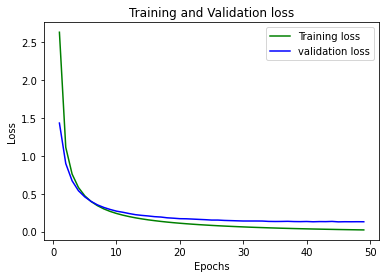

In [9]:
# Plotting of Validation and Training Loss

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,50)   # ======== Adjust this! ==========
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

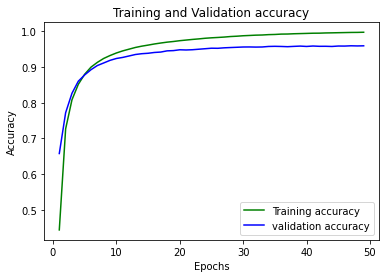

In [10]:
# Plotting of Validation and Training Accuracy 

loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,50)   # ========== Adjust This! ==========
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
model_json = mobilenet.to_json()
with open("super_model_arch.json", "w") as json_file:
    json_file.write(model_json)
    
mobilenet.save_weights("super_model_weights.h5")

In [12]:
from keras.models import model_from_json
model = model_from_json(open('super_model_arch.json').read())

model.load_weights('super_model_weights.h5')

In [16]:
import cv2
import numpy as np

img_path = 'samples/38.png'

# image_resized= cv2.resize(image, (224,224))
# image=np.expand_dims(image_resized,axis=0)

def prepare(file):
    IMG_SIZE = 224
    
    image = cv2.imread(file)
    image_resized= cv2.resize(image, (224,224))
    image=np.expand_dims(image_resized,axis=0)
    return image
    
# def prepare(file):
# #     IMG_SIZE_X = 100
# #     IMG_SIZE_Y = 140
#     img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
# #     new_array = cv2.resize(img_array, (IMG_SIZE_X, IMG_SIZE_Y))
#     return img_array.reshape(-1, 100, 140, 1)
img_file = prepare(img_path)
pred = model.predict(img_file)
output_class = class_names[np.argmax(pred)]

1/1 [==============================] - 0s 29ms/step


In [14]:
pred

array([[5.39534772e-03, 2.23994642e-19, 5.53604895e-15, 5.30124709e-08,
        2.53723431e-11, 4.03534628e-08, 9.42880553e-14, 3.90411659e-09,
        6.61538478e-13, 1.96830197e-09, 8.73548248e-11, 1.46658196e-12,
        2.35407545e-15, 1.98553773e-09, 1.96657355e-15, 3.27455667e-11,
        2.36616149e-08, 1.27133262e-10, 6.43658793e-10, 4.11453954e-10,
        1.07126215e-13, 1.06085193e-12, 6.41042108e-09, 1.56682152e-08,
        8.24216073e-08, 1.78737407e-12, 8.02472916e-14, 5.31539646e-10,
        6.32427305e-11, 8.56366866e-10, 4.36245662e-09, 2.95314076e-05,
        5.25638699e-10, 1.20755267e-10, 9.73604131e-09, 9.83423233e-01,
        4.18168350e-15, 3.57155169e-13, 2.58432520e-09, 9.52717679e-12,
        9.41191292e-11, 7.20846094e-09, 2.04406266e-15, 8.95975351e-13,
        4.55646116e-08, 7.59329318e-12, 5.11165240e-07, 7.71869073e-14,
        5.27132366e-11, 1.37637091e-12, 2.14046381e-08, 8.73736500e-11,
        9.63369365e-15, 4.95187467e-11, 2.09648249e-12, 1.379625

In [17]:
output_class

'vi'